**Time Series Data**

1. A sequernce of information which attaches a time period to each value
2. The interval of time between one point of the set and the next is called a time period
3. How often the value of the data is recorded is reffered to as the frequency of the data set
4. All time period must be **equal and clearly defined**, which would result in **constant** frequency.
5. Patterns observed in a Time series are ecpected to persists in the future.
6. The values of every period are affected by outside factors and by the values of past periods.
7. Time dependent data suffers from Seasonality.
8. The Time series variable is described eith captital Letter 'X' or 'Y' ex: Price
9. The entire period covered by the time serie with 'T' ex: Year
10. 't' is used to describe a single period ex: Single Day
11. The interval between the data need to be identical.
11. Time series data need to have chronological order.

# Import the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats
import pylab

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# Import the data

In [2]:
raw_csv_data = pd.read_csv('Index2018.csv')

In [3]:
df_comp = raw_csv_data.copy()

# Examining the data

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


Use date as indexs for the time series data

Various market Indexes
- SPX -> S&P500 USA
- DAX -> DAX30 GERMANY
- FTSE -> FTSE100 LONDON
- nikkei -> NIKKEI225 JAPAN

In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


1. The average value of spx is several time lower compared to other indexes
2. The max value of spx is lower than min value of ftse and nikkei
3. The value of dax and ftse are similar and spx and nikkei are a lot smaller and larger respectively 

# Finding missing values

In [6]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Plotting the data

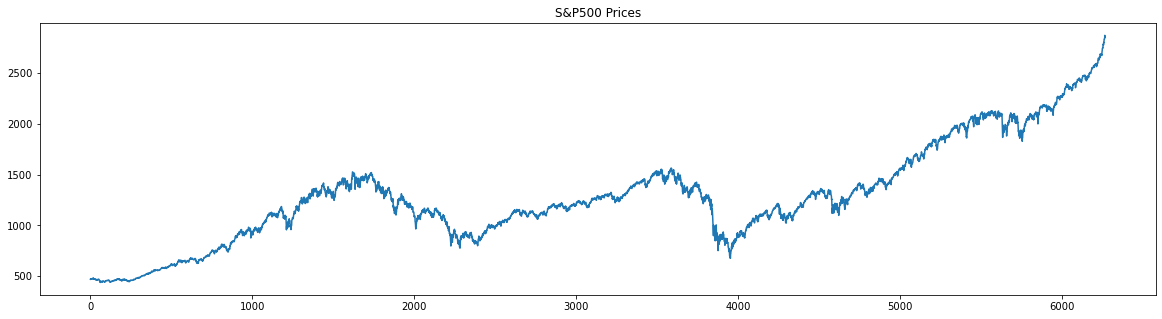

In [7]:
df_comp.spx.plot(figsize=(20,5), title='S&P500 Prices')
plt.show()

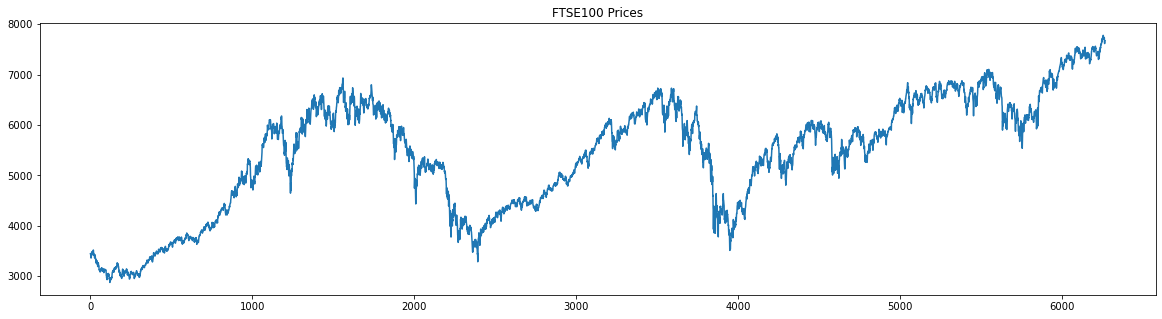

In [8]:
df_comp.ftse.plot(figsize=(20,5), title='FTSE100 Prices')
plt.show()

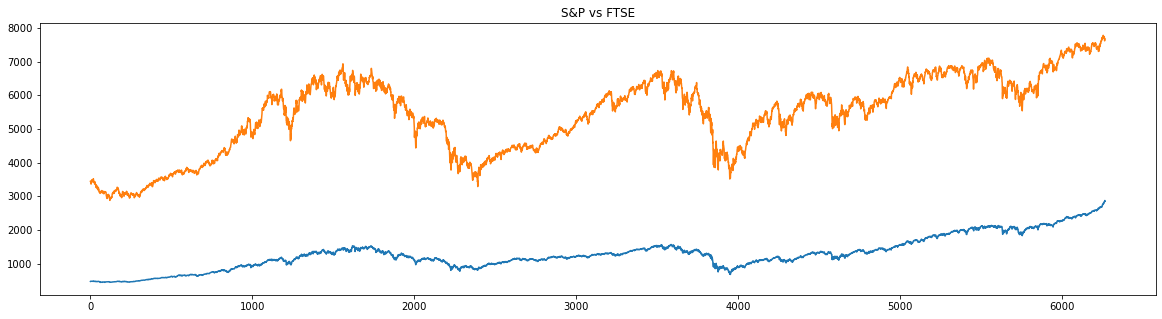

In [9]:
df_comp.spx.plot(figsize=(20,5), title='S&P500 Prices')
df_comp.ftse.plot(figsize=(20,5), title='FTSE100 Prices')
plt.title('S&P vs FTSE')
plt.show()

### QQ PLOT (QUANTILE QUANTILE PLOT)

- Used to determine whether the dataset is distributed in a certain way
- usually showcases how the data fits a normal distribution

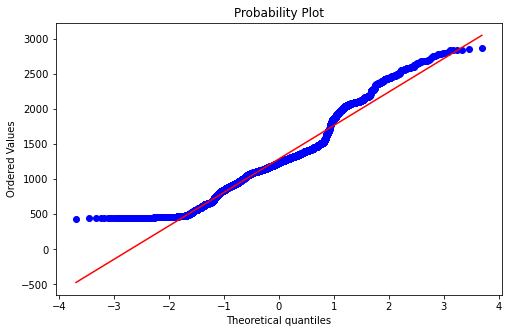

In [10]:
scipy.stats.probplot(df_comp.spx, plot= pylab)
pylab.show()

- A qqplot can takes all the value a variable an take and arranges them in  accending order
- The Y axis is the prices 
- The X axis are theoritical quantiles ie, how many std deviation away from the mean these values are
- The red line indicates what the data points should follow, if they are normally distributed
- Since the data has more values around the 500 price range, we can say that the data is not normally distributed
- This is what is expected from the time series data

# Length of the time period

- Transforming the dataframe into a time series
- Transforming the date column into date type

In [11]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

The top date is misleading and is arbitrary

# From Text to Date


In [12]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)

In [13]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [14]:
df_comp.date.describe()

C:\Users\viswa\AppData\Local\Temp/ipykernel_4008/49469409.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comp.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

# Setting the index

- Each value should correspond to a time period
- To examine specific chunks of data between two concrete dates
- Seperating the data before and after certain date
- We need to use the associated time period as indices

In [15]:
df_comp.set_index('date', inplace=True)

In [16]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Setting the desired frequency

- 'h'-- hourly
- 'd'-- daily
- 'w'-- weekly
- 'm'-- monthly
- Data measured once per year is 'annual' rather than 'yearly', so use 'a' instead of 'y

In [17]:
df_comp = df_comp.asfreq('d')   # d-> dataset contains daily value

In [18]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


Generated new period as these dates were not included in the original dataframe

In [19]:
df_comp = df_comp.asfreq('b')   # b-> business days only (No weekend and holiday)

In [20]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Handling the missing values

In [21]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

1. Front Filling: Assign the value of the previous period
2. Back Filling: Assign the value of the next period
3. Assigning the same value: Assign the average to all the missing value within the time series 
- The third method is appropriate only when the data is heavily fulctuates around the mean from the first to last day

In [22]:
df_comp.spx = df_comp.spx.fillna(method='ffill')
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [23]:
df_comp.ftse = df_comp.ftse.fillna(method='bfill')
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [24]:
df_comp.dax = df_comp.dax.fillna(value=df_comp.dax.mean())
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [25]:
df_comp.nikkei = df_comp.nikkei.fillna(method='ffill')
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Simplifying the dataset

- The less data is we store the faster we can manipulate
- Clarity - Easier  to keep track of the dataset
- Create a column called Market Value

In [26]:
df_comp['market_value'] = df_comp.spx

In [27]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.672753,1288.642547
std,487.868210,2752.604984,1145.568370,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [28]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

In [29]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


# Splitting the dataset

Suffling the data is impossible in Time series data

In [30]:
size = int(len(df_comp)*0.8)

In [31]:
df = df_comp.iloc[:size]

In [32]:
df_test = df_comp.iloc[size:]

In [33]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [34]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


In [35]:
df.shape

(5021, 1)

# White Noise

- White Noise is a special type of time series where the data doesn't follow a pattern hence it is unperictable
- A sequence of random data, where every value has a time period associated with it
- Constant Mean
- Constant Variance
- No Autocorrelation

In [36]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [37]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [38]:
df['wn'] = wn

C:\Users\viswa\AppData\Local\Temp/ipykernel_4008/672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [39]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1095.581032
std,292.559287,294.896412
min,438.920000,-69.419556
25%,914.620000,897.076985
50%,1144.650000,1092.329391
75%,1316.280729,1295.649406
max,1570.252238,2282.425600


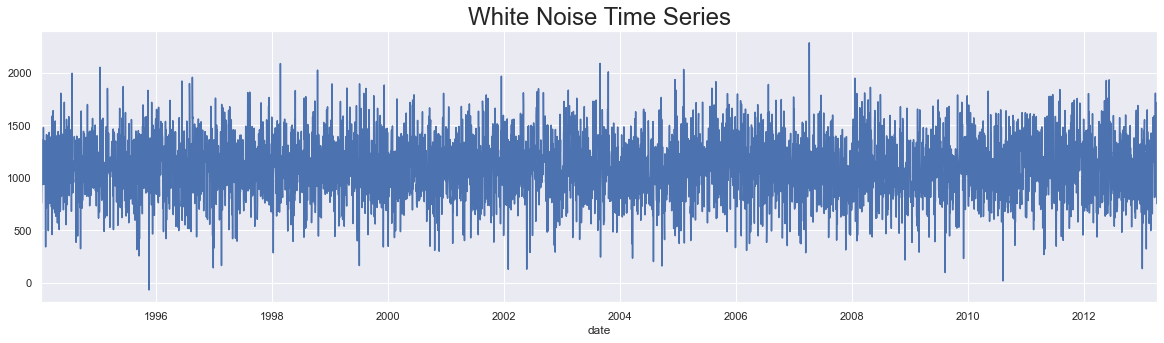

In [40]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time Series", size=24)
plt.show()

- No clear pattern in the data
- Most of the values forming around the mean

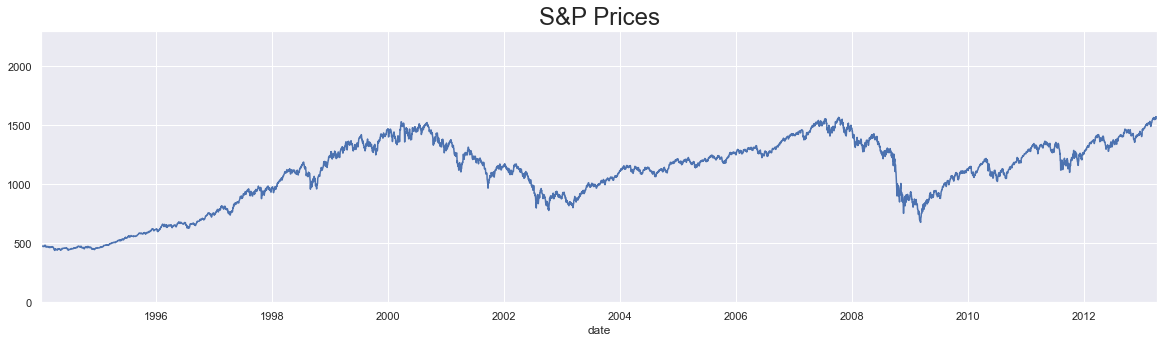

In [41]:
df.market_value.plot(figsize = (20,5))
plt.title("S&P Prices", size= 24)
plt.ylim(0,2300) # sets the limits of the y axis
plt.show()

 # Random Walk

A special type of Time series, where values tend to persist overtime and the difference between periods are simply white noise

- Pt = prices
- Et = residuals

Pt = Pt-1 + Et

Et ~ Wn(Mean and Std**2)

In [42]:
rw = pd.read_csv('RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')

In [43]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [44]:
df['rw'] = rw.price

C:\Users\viswa\AppData\Local\Temp/ipykernel_4008/818302766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [45]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1270.363767,1122.139662
1994-01-10,475.27,757.525903,1080.347860
1994-01-11,474.13,963.874990,1082.095245
1994-01-12,474.17,1304.097796,1083.639265
1994-01-13,472.47,1358.096848,1067.146255


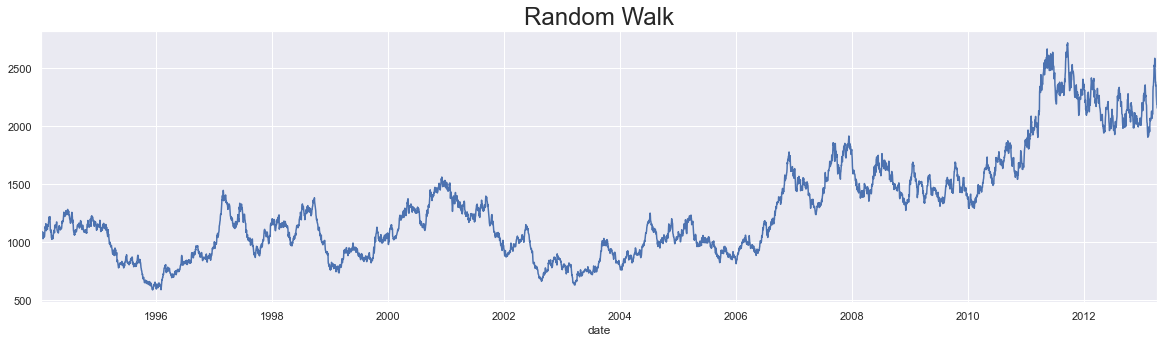

In [46]:
df.rw.plot(figsize = (20,5))
plt.title('Random Walk', size = 24)
plt.show()

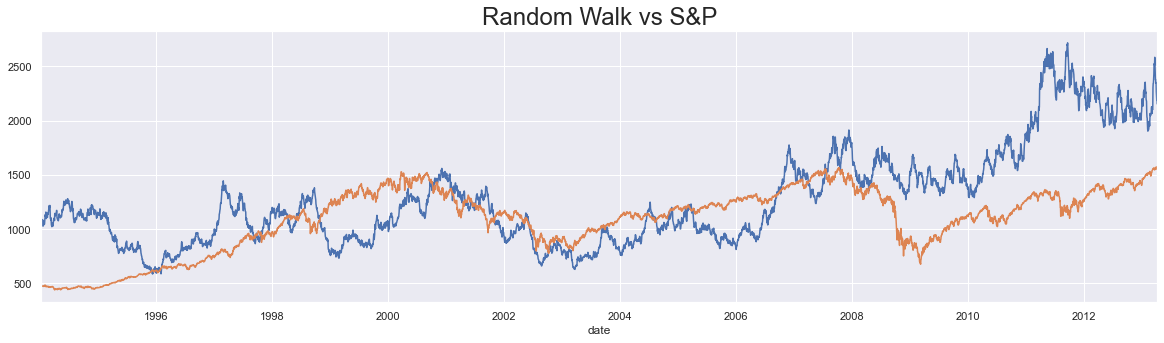

In [47]:
df.rw.plot(figsize = (20,5))
df.market_value.plot(figsize = (20,5))
plt.title('Random Walk vs S&P', size = 24)
plt.show()

- Both have small variation between consecutive time period
- Both have cyclical increases and decreases in short period of time

# Stationarity

- Stationaity simply implies that taking consecutive samples of data with the same size should have identical covariances regardless of the starting point.
- cov(S1) = cov(S2)
- This characteristic of the data is also known as weak form stationarity or covariance stationarity.
- Has constant Mean
- Has constant variance
- Has consistant Covariance between periads at an identical distance from one another Cov(Xt , Xn+t) = Cov(Xm, Xm+t) 
- Example Cov(X1, X4) = Cov(X3,X6) as they are three intervals apart

# Dickey Fuller Test

In [48]:
sts.adfuller(df.market_value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

- On the first Line, we see the T statistics from running the test, which is compared with the critical value to determine whether we have stationarity data
- It also provides 1, 5 and 10 percent critical values from the dickey fuller tables
- The T statistic is greater than each 1,5 and 10 percent critical value, we can say that the data is non stationarity
- The second line of the result expresses the p value associated with the T-statictics. The value 0.41 represent thet there is 40 percent chance of not rejecting the null hypothesis
- The third line indicates, the number of lags used in the regression when determining the T statistics. The value 18 indicates there are some autocorrelation going back 18 periods.
- The fourth line 5002 expresses the number of observations used in the analysis. This value depends on the number of lags used in he regression. So the two usually should add up to the size of the dataset.
- The last line of the code estimates the maximized information criteria providedthere is some autocorrelation. The lower the value, the easier it is to make future predictions 

In [49]:
sts.adfuller(df.wn)

(-35.86140283566579,
 0.0,
 3,
 5017,
 {'1%': -3.431654095870046,
  '5%': -2.8621162697870046,
  '10%': -2.5670767490325597},
 70881.88141568715)

We know that the White Noise is a stationarity process, so we expect to get a very low p-value and since there is no autocorrelation in white noise, there should be no lags involved in the regression.  

In [50]:
sts.adfuller(df.rw)

(-1.3286073927689717,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

The p-value is around 0.62, so we dont have enough evidence to identify this time series as stationary

# Seasonality

Seasonality suggest that certain trends will appear on a cyclical basis

There are sevaral ways of testing for seasonality.
One approach is to decompose the sequence where we split up the Time Series into three effects - Trends, Seasonal and Residuals

- Trend --> Pattern
- Seasonal --> Cyclical Data
- Residual --> Erron of prediction

Naive Decomposition
- Additive 
> Observed = Trend + Seasonal + Residual

- Multiplicative
> Observed = Trend * Seasonal * Residual

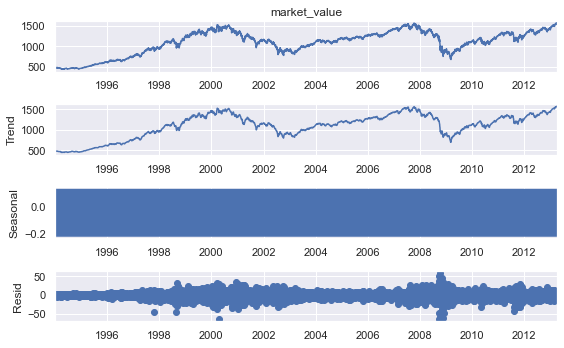

In [51]:
s_dec_additive = seasonal_decompose(df.market_value, model="additive")
s_dec_additive.plot()
plt.show()

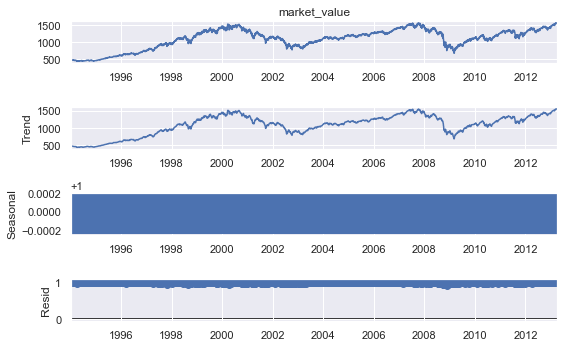

In [52]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model="multiplicative")
s_dec_multiplicative.plot()
plt.show()

- The trend closely resembles the observed series
- The seasonal sequence hjas no clear pattern
- Hence we can say that, there is no seasonality among S&P prices

# Correlation between past and present values

- Correlation measures the similarity in the change of values of two series. 
- Since we have only single variable to claculate the similarity in a single time series change through time, a new concept autocorrelation is used.
- As the name suggest, autocorrelation represents the correlation between a sequence and itself.
- It measures the level of resembalance between a sequence from several periods ago and the actual data.
- Such a series is called a lagged, because it is essentially a delayed version of original one.
- Ex: If the frequency id daily, then how much is yesterdays values resembles todays values.

# Autocorrelation Function (ACF)

- In time series analysis, it is vital to compute and compare autocorrelation values between different lag's.
- The ACF computes the autocorrelation value for however many lag's we are intrested in simultaneously.

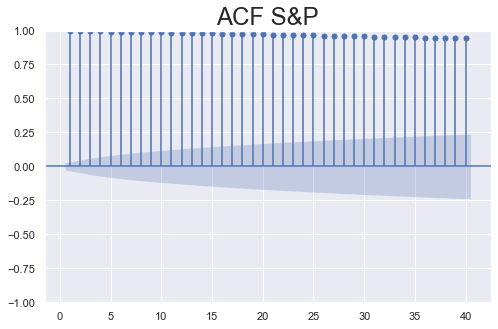

In [53]:
sgt.plot_acf(df.market_value, lags=40, zero=False) 

# The last 40 periods before the current one.
# Zero = False, This argument indicates whether we include the current period value in the graph. 
# Setting the argument equals to false ensures we only observe a plot for higher lag values.

plt.title("ACF S&P", size = 24)
plt.show()

- The values on the x axis represents the number of lags
- The y axis represents the autocorrelation coefficients and its values ranges from -1 to 1
- The first vertical line indicates the autocorrelation of one time period ago, the second line represents the coefficient value for two periods ago and so on.
- The blue area on the x azis represents the significances, the values situated outside are significantly different from zero, which suggests the existance of autocorrelation for that specific lag.
- The greater the distance in time, the more unlikely it is that this autocorrelation persists
- Ex: Today's prices are usually closer to yesterday's prices than the prices a months ago 
- The lines are higher than the blue regions, this suggests the coefficients are significants, which is an indicator of time dependence in the data.
- The autocorrelation barely decreases as the lags increases. That means the prices even a months back can still serves as decent estimates.

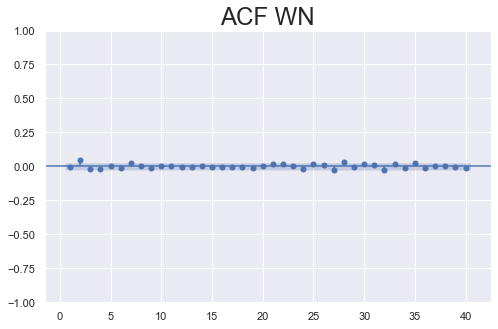

In [54]:
sgt.plot_acf(df.wn, lags=40, zero=False) 
plt.title("ACF WN", size = 24)
plt.show()

- Patterns of positive and negative correlation.
- All the lines fall within the blue area, thus coeffients are not significant across the entire plot.
- This suggest there are no autocorrelation for any lags 

# Pattial Autocorrelation Function (PACF)

- Autocorrelation measures the similarity between a time series and a lagged versions of itself.
- The coefficients also captures the second hand effects
- It captures both direct and indirect ways in which the lagged series affects the original one.
- By indirect, we refer to all other channels through which past data affects the current data.
- Ex: The prices three days ago affects the two and one day ago prices, which affects the present prices.
- In order to determine the direct relationship between the Time Series and its lagged version we need to compute the  partial autocorrelation. 

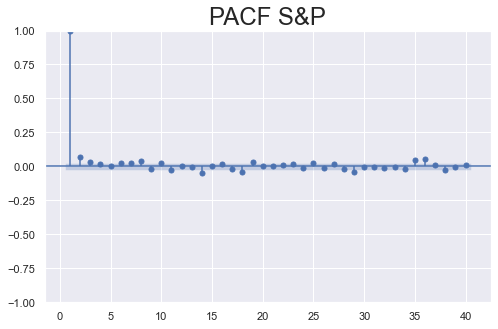

In [58]:
sgt.plot_pacf(df.market_value, lags=40, zero=False, method= ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

- Only the first several elements are significantly different from zero.
- Also, some of the values like the ninth lag are negative, this means that higher values nine periods ago results in lower values today and vice versa.
- PACF cancels out all additional channels in which a previous period value affects the present one. 
- The PACF measures the affect values in period Xt-2 on value in period Xt directly.
- The PACF cancels out the affects prices two days ago have on prices yesterday, which inturn affects prices today.
- Whereas the ACF show the combined affects of the prices from two days ago, both direct and through yesterdays prices, while the PACF only shows the direct affects.
- The ACF and PACF values for the first lag should be identical.
- This is there is no other channels through which past values affects the present values
- Most values after the third lag are within the blue area, this means they arent significantly different from zero, so the numerical values attached to them are not important.
- Being positive or negative is somewhat random without any lasting effects.

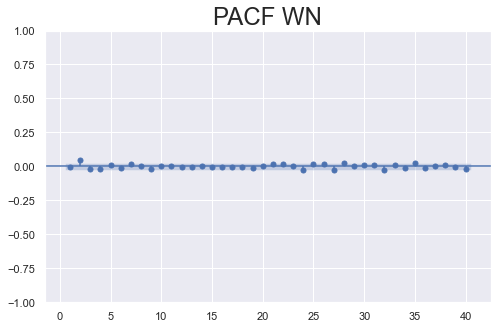

In [59]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method= ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

- The values are not significantly different from zero sum of the coefficients
- There exist no autocorrelation in white noise.